In [2]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from analyser import *

con = psycopg2.connect("dbname=test1")

## Users selection
We distinguish users kind :
    
* "instructor"
* "administrator"
* "demo"

In [3]:
# subs = generate_submissions(users=10, pbls=100)
users = pd.read_sql_query("select user_id, creation_date from users \
                            where demo=0 and instructor=0 and administrator=0\
                            ", con=con)

lusers = users.user_id.tolist()
usersstr = str(lusers).strip('[]')

## Problems selection
We only analyse 'Pxxxxx' type problems

In [4]:
probs = pd.read_sql_query("select problem_nm from problems where problem_id like 'P%%'\
                          ", con=con)

# problem_id like 'P%%'

lprobs = [p[0] for p in probs.values if p[0]]
lprobsstr = str(lprobs).strip('[]')

## Sublissions selection

In [9]:
submissions = pd.read_sql_query("select submission_uid, user_id, problem_id, submission_id, compiler_id, \
                        state, time_out, time_in, veredict, score \
                        from submissions where user_id in (%s);" % (usersstr),
                                con=con)

# get rid of languages
submissions.problem_id = submissions.problem_id.apply(lambda x: x[:-3])
#submissions.set_index('submission_uid', inplace=True)

subs = submissions[submissions.problem_id.isin(lprobs)]

In [10]:
subs.head()

,submission_uid,user_id,problem_id,submission_id,compiler_id,state,time_out,time_in,veredict,score
25547,S000469881,U00006,P88760,S001,G++,done,2011-04-27 01:49:55,2011-04-27 01:49:46,AC,None
25548,S000469885,U00006,P88760,S002,G++,done,2011-04-27 02:36:21,2011-04-27 02:36:13,AC,None
25549,S000469887,U00006,P88760,S003,G++,done,2011-04-27 02:51:06,2011-04-27 02:50:58,AC,None
25550,S000470232,U00006,P88760,S004,G++,done,2011-04-27 16:12:39,2011-04-27 16:12:30,EE,None
25551,S000470233,U00006,P88760,S005,G++,done,2011-04-27 16:13:30,2011-04-27 16:13:22,AC,None


In [11]:
g = subs.compiler_id.value_counts(normalize=True)

<IPython.core.display.Javascript object>


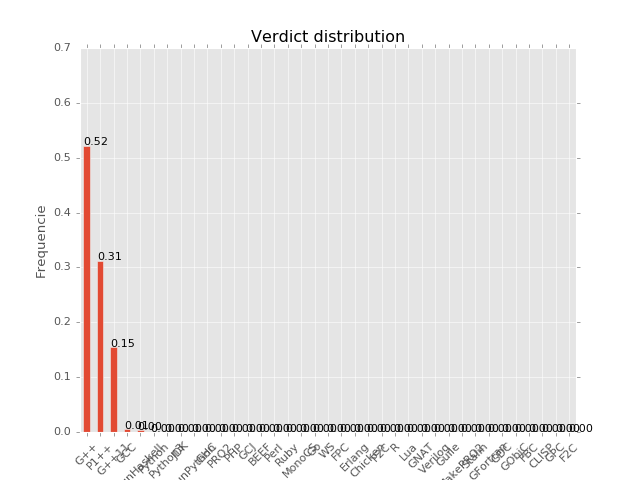

In [21]:
width = 0.35
ax = g.plot(kind='bar', rot=45)
for p in ax.patches:
    #ax.annotate(("%.2f" % p.get_height()), (p.get_x() , p.get_height()))
    ax.annotate(("%.2f" % p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


ax.set_ylim(0,0.7)
ax.set_ylabel('Frequencie')
ax.set_title('Verdict distribution')
plt.show()

<IPython.core.display.Javascript object>


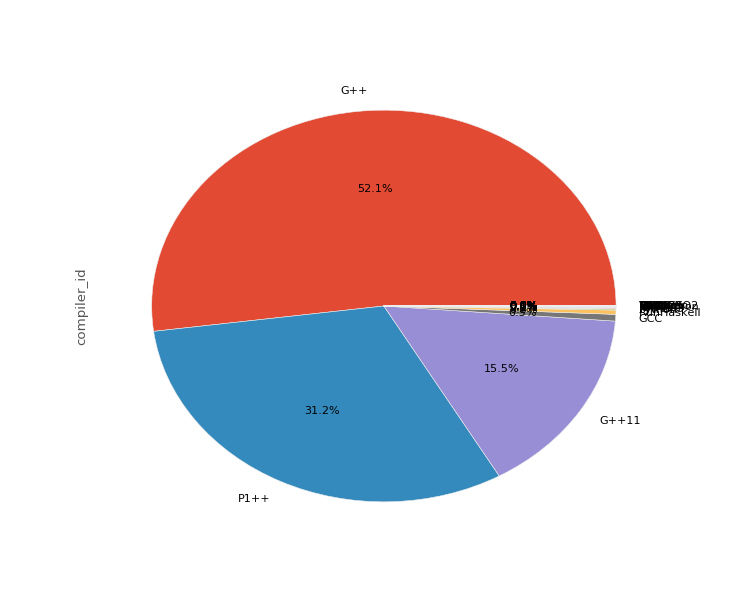

In [25]:
plt.figure()
g.plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [26]:
g

G++           5.206662e-01
P1++          3.120956e-01
G++11         1.549293e-01
GCC           5.486946e-03
RunHaskell    3.490911e-03
Python        8.775672e-04
Python3       5.965163e-04
JDK           5.635358e-04
RunPython     4.108219e-04
GHC           3.635021e-04
PRO2          1.261861e-04
PHP           9.320567e-05
GCJ           6.094217e-05
BEEF          3.728227e-05
Perl          3.441440e-05
Ruby          3.082957e-05
MonoCS        2.365990e-05
Go            2.007507e-05
WS            1.505630e-05
FPC           1.147147e-05
Erlang        1.075450e-05
Chicken       1.003753e-05
P2C           7.886633e-06
R             7.169667e-06
Lua           7.169667e-06
GNAT          3.584833e-06
Verilog       2.867867e-06
Guile         2.867867e-06
MakePRO2      2.150900e-06
Stalin        2.150900e-06
GFortran      2.150900e-06
GDC           2.150900e-06
GObjC         2.150900e-06
FBC           7.169667e-07
CLISP         7.169667e-07
GPC           7.169667e-07
F2C           7.169667e-07
N